In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Importing the Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- Reading the data and Getting an Idea of it.

In [61]:
df = pd.read_csv('Zomato Dataset.csv')

In [62]:
df.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [64]:
df.isnull().mean()*100

,0
ID,0.000000
Delivery_person_ID,0.000000
Delivery_person_Age,4.067217
Delivery_person_Ratings,4.185679
Restaurant_latitude,0.000000
Restaurant_longitude,0.000000
Delivery_location_latitude,0.000000
Delivery_location_longitude,0.000000
Order_Date,0.000000
Time_Orderd,3.797385


- 8 out of 19 coulmns have null values.
- The maximum percentage of null value is around 4.2.
- So I'll be imputing the values in these columns so that we have cleaned data.

In [65]:
# 1.)Handling null values for 'Delivery_person_Age' column:
df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].median(),inplace=True)

In [66]:
# 2.)Handling null values for 'Delivery_person_Ratings' columnn:
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(),inplace=True)

In [67]:
# 3.) Handling missing values for 'Time_Orderd' column:
df['Time_Orderd'].fillna(df['Time_Orderd'].mode()[0],inplace=True)

In [68]:
# 4.) Handling missing values for 'Weather_conditions' column:
df['Weather_conditions'].fillna(df['Weather_conditions'].mode()[0],inplace=True)

In [69]:
# 5.) Handling missing values for 'Road_traffic_density' column:
df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0],inplace=True)

In [70]:
# 6.) Handling missing values for 'multiple_deliveries' column:
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0],inplace=True)

In [71]:
# 7.) Handling missing values for 'Festival' column:
df['Festival'].fillna(df['Festival'].mode()[0],inplace=True)

In [72]:
# 8.) Handling missing values for 'City' column:
df['City'].fillna(df['City'].mode()[0],inplace=True)

- Imputed all missing values or dropped them.

In [73]:

df.duplicated().sum()

0

- Now our data is clean and ready to perform EDA.

1. Descriptive Statistics:
- Provide descriptive statistics (mean, median, mode, range, and standard deviation) for continuous variables like Delivery_person_Age , Delivery_person_Ratings , and Time_taken (min) .

MEAN

In [74]:
df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken (min)']].mean()

,0
Delivery_person_Age,29.584525
Delivery_person_Ratings,4.636546
Time_taken (min),26.293963


MEDIAN

In [75]:
df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken (min)']].median()

,0
Delivery_person_Age,30.0
Delivery_person_Ratings,4.7
Time_taken (min),26.0


MODE

In [76]:
df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken (min)']].mode()

,Delivery_person_Age,Delivery_person_Ratings,Time_taken (min)
0,30.0,4.7,26


RANGE

In [77]:
df['Delivery_person_Age'].max()-df['Delivery_person_Age'].min()
df['Delivery_person_Ratings'].max()-df['Delivery_person_Ratings'].min()
df['Time_taken (min)'].max()-df['Time_taken (min)'].min()

35.0

5.0

44

STANDARD DEVIATION

In [78]:
df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken (min)']].std()

,0
Delivery_person_Age,5.696221
Delivery_person_Ratings,0.327931
Time_taken (min),9.384298


CONCLUSION :
- Age, Rating and Time_Taken is similar in parameters like Mean, Median and Mode which leads to tells us that the distribution is almost Normal this also tells us that there is no or neglibigle number of outliers.
- Range is 35 for age, 5 for rating and 44min for Time_taken.
- Standard Deviation tells us the spread of the data for these 3 columns.
- Std for Time_taken is large which means it has a vast spread than the other 2 columns.

2. Distribution Analysis:
- Plot the histograms for Delivery_person_Age and Time_taken (min) . What does the distribution tell you about these variables?

<Figure size 1400x500 with 0 Axes>

<Axes: xlabel='Delivery_person_Age', ylabel='Count'>

Text(0.5, 1.0, 'Distibution of Delivery_person_Age')

Text(0.5, 0, 'Delivery Person Age')

Text(0, 0.5, 'Frequency')

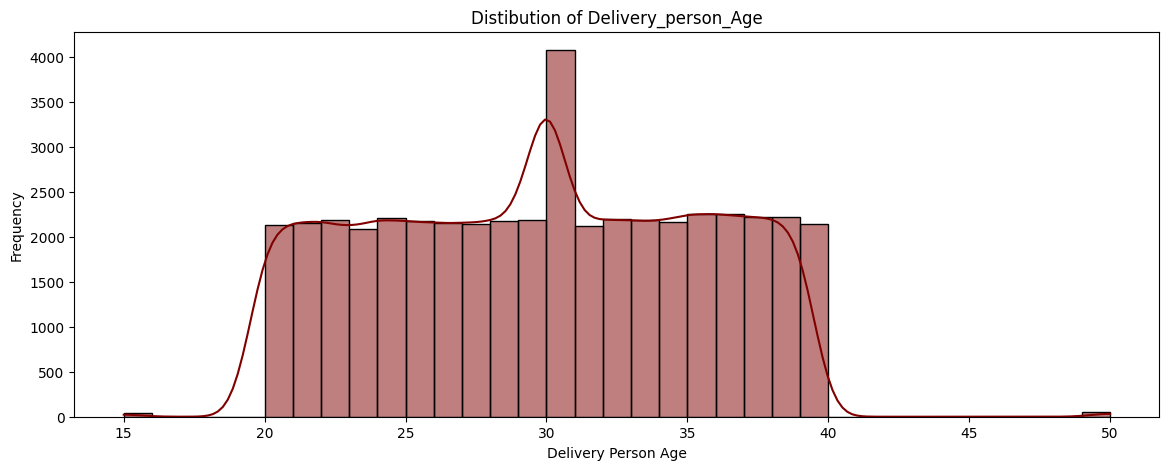

In [79]:
# Histogram for Deliver_person_Age
plt.figure(figsize= (14, 5))
sns.histplot(df['Delivery_person_Age'], bins=35, kde=True, color='maroon', edgecolor='black')
plt.title('Distibution of Delivery_person_Age')
plt.xlabel('Delivery Person Age')
plt.ylabel('Frequency')
plt.show()

CONCLUSION :
- Almost 99% values lie between 20 to 40.
- Values Outside of this range can be treated as outliers.

<Figure size 1400x500 with 0 Axes>

<Axes: xlabel='Time_taken (min)', ylabel='Count'>

Text(0.5, 1.0, 'Distibution of Time_taken (min)')

Text(0.5, 0, 'Time_taken (min)')

Text(0, 0.5, 'Frequency')

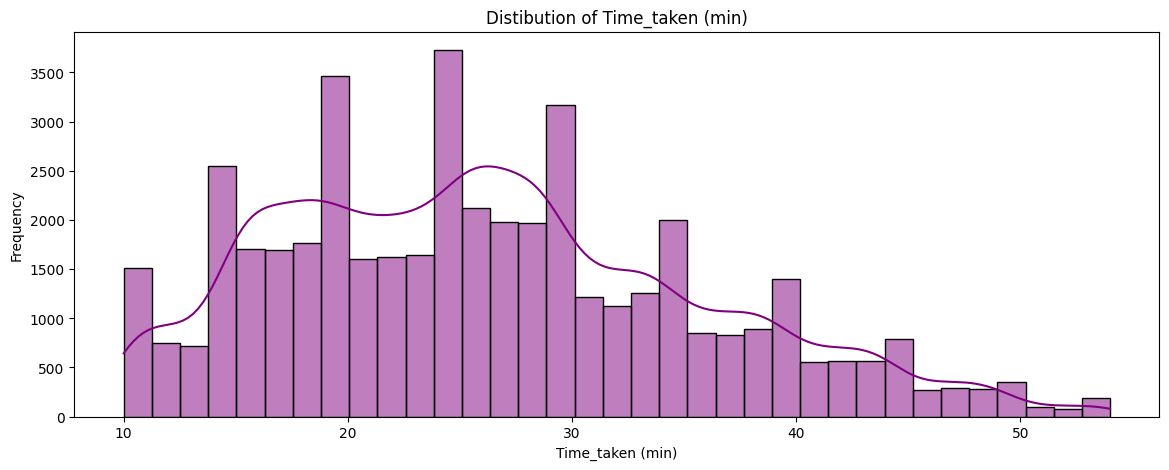

In [80]:
# Histogram for Deliver_person_Age
plt.figure(figsize= (14, 5))
sns.histplot(df['Time_taken (min)'], bins=35, kde=True, color='purple', edgecolor='black')
plt.title('Distibution of Time_taken (min)')
plt.xlabel('Time_taken (min)')
plt.ylabel('Frequency')
plt.show()

CONCLUSION :
- Highly Right Skewed Data.
- There are peaks forming in the data on intervals.

3. Correlation Analysis:
- Calculate and plot the correlation matrix for the numeric variables. Which variables show the highest positive and negative correlation?

In [81]:
# Getting All Numerical Columns
numerical_columns = df.select_dtypes(include='number')

In [82]:
corr_matrix = numerical_columns.corr()

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

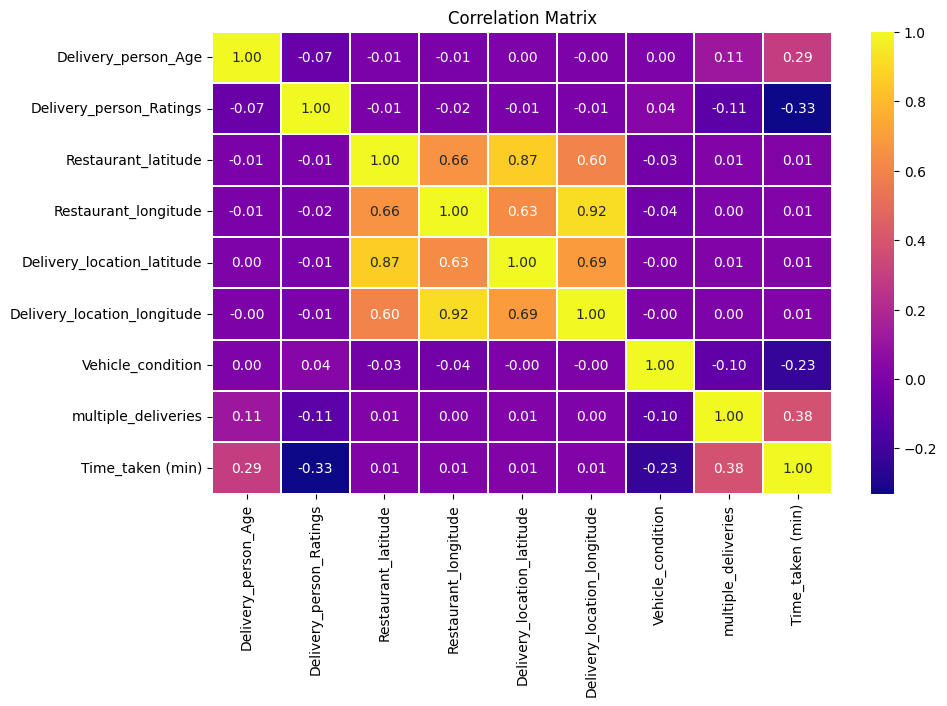

In [83]:
# plotting The Heamap For Showing Correlation
plt.figure(figsize= (10, 6))
sns.heatmap(corr_matrix, annot=True, fmt="0.2f", cmap='plasma', linecolor='white', linewidths=0.3)
plt.title('Correlation Matrix')
plt.show()

CONCSLUTION :
- There's a strong positive correlation between `Restaurant_latitude` and `Delivery_location_latitude`, and between `Restaurant_longitude` and `Delivery_location_longitude`. This suggests that most deliveries are made within a relatively close proximity to the restaurant's location.
- While the correlation coefficients are not very high, there's a slight positive correlation between `Time_taken (min)` and both `Delivery_location_latitude` and `Delivery_location_longitude`. This indicates that, generally, longer delivery times are associated with greater distances between the restaurant and the delivery location.
- There's a moderate negative correlation between `Delivery_person_Ratings` and `multiple_deliveries`. This might suggest that delivery persons with higher ratings tend to handle fewer deliveries at a time, possibly leading to better customer service and satisfaction.
- `Vehicle_condition` shows minimal correlation with most other variables. This could indicate that the condition of the delivery vehicle has a limited impact on factors like delivery time, ratings, or location.
- There's a weak negative correlation between `Delivery_person_Age` and `Delivery_person_Ratings`. This might suggest that younger delivery persons tend to have slightly higher ratings, although the relationship is not very strong.


4. Time Series Analysis:
- How does the average time taken for deliveries change over different months? Plot a line graph to illustrate this trend.


In [84]:
# Convert the Order_Date column to a datetime format and extract the month.
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')
df['Order_Month'] = df['Order_Date'].dt.month

In [85]:
# Group the data by the Order_Month and calculate the average Time_taken (min) for each month.
avg_time_per_month = df.groupby('Order_Month')['Time_taken (min)'].mean()
avg_time_per_month

,Time_taken (min)
Order_Month,
2,26.533140
3,26.275351
4,26.115233


<Figure size 1500x400 with 0 Axes>

<Axes: xlabel='Order_Month'>

Text(0.5, 1.0, 'Average Delivery Time per Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Time Taken (min)')

([<matplotlib.axis.XTick at 0x7c5f497b41f0>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May')])

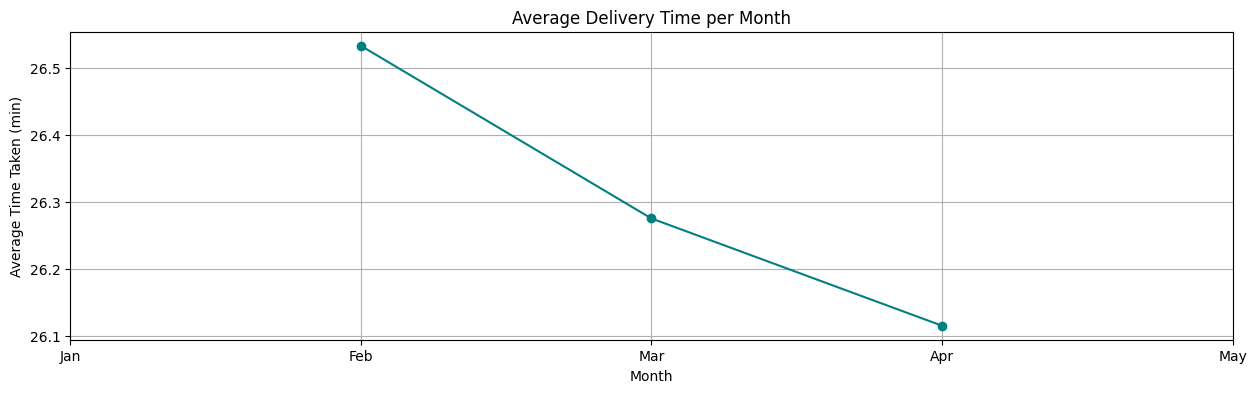

In [86]:
# Line plot showing the trend of average delivery times over the months.
plt.figure(figsize=(15, 4))
avg_time_per_month.plot(kind='line', marker='o', color='teal')
plt.title('Average Delivery Time per Month')
plt.xlabel('Month')
plt.ylabel('Average Time Taken (min)')
plt.xticks(ticks=range(1, 6), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.grid(True)
plt.show()

CONCLUSION :
- The general trend is a decline in average delivery time from January to April. This suggests that the delivery process has become more efficient over this period.
- While there's an overall downward trend, there are month-to-month fluctuations in delivery times. For example, the average time increased slightly from February to March. This might indicate factors like changes in demand, weather conditions, or operational challenges during specific months.
- April stands out with the lowest average delivery time. This suggests that the delivery operations were particularly efficient or faced less congestion during this month.


5. Categorical Data Analysis:
- How does the Type_of_order affect the Time_taken (min) ? Use boxplots to compare the different types.


In [87]:
df['Type_of_order'].value_counts()

,count
Type_of_order,
Snack,11530
Meal,11456
Drinks,11321
Buffet,11277


<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Type_of_order', ylabel='Time_taken (min)'>

Text(0.5, 1.0, 'Time Taken for Different Types of Orders')

Text(0.5, 0, 'Type of Order')

Text(0, 0.5, 'Time Taken (min)')

([0, 1, 2, 3],
 [Text(0, 0, 'Snack'),
  Text(1, 0, 'Meal'),
  Text(2, 0, 'Drinks'),
  Text(3, 0, 'Buffet')])

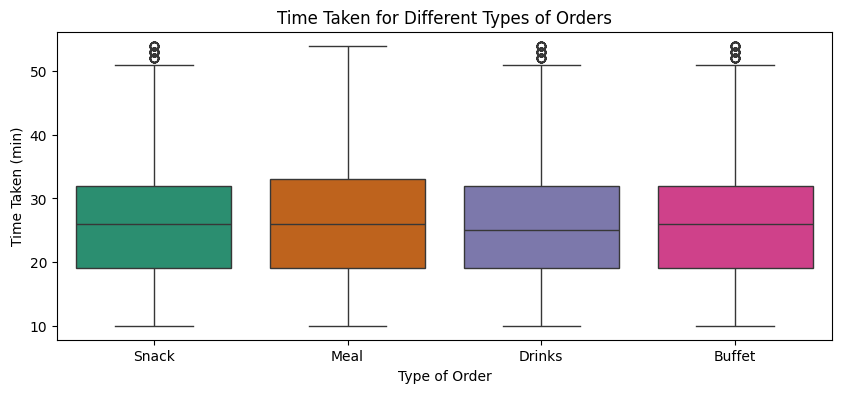

In [88]:
# Box Plot for 'Type of Order' and 'Time_taken (min)'
plt.figure(figsize=(10, 4))
sns.boxplot(x='Type_of_order', y='Time_taken (min)', data=df, palette='Dark2')
plt.title('Time Taken for Different Types of Orders')
plt.xlabel('Type of Order')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=0)
plt.show()

CONCLUSION :
- The box plot shows that the median delivery time for meal orders is higher than that of snacks, drinks, or buffets. This leads to tells us that meal order generally takes longer time to prepare..
- The box plot for drinks has the smallest interquartile range, indicating that the delivery times for drinks are generally less variable compared to other order types.

6. Geographical Analysis:
- Plot the locations of restaurants and delivery locations on a scatter plot using Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, and Delivery_location_longitude. Are there any clusters?

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Geographical Distribution of Restaurants')

Text(0.5, 0, 'Latitude')

Text(0, 0.5, 'Longitude')

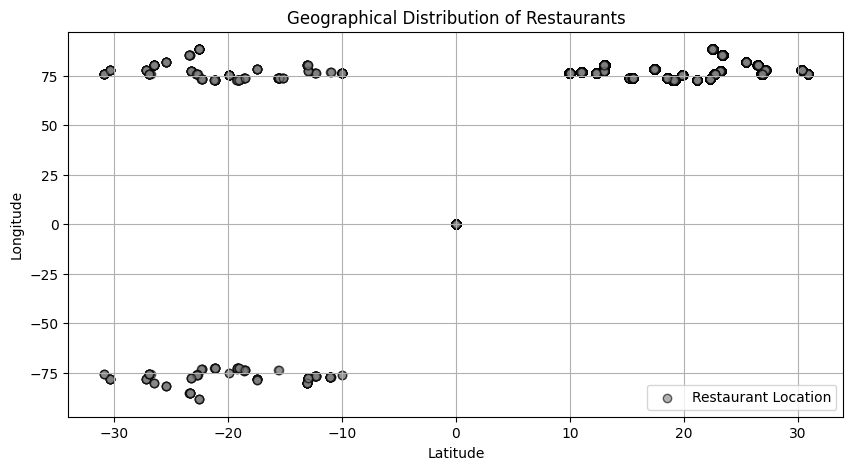

In [89]:
# Plot restaurant locations
plt.figure(figsize=(10, 5))
plt.scatter(df['Restaurant_latitude'], df['Restaurant_longitude'],  color='grey', label='Restaurant Location', alpha=0.6, edgecolor='black')
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid(True)
plt.show()

CONCLUSION :
- The scatter plot shows a clear clustering of restaurants in certain regions. This suggests that there may be factors such as population density, economic activity, or cultural preferences influencing restaurant locations.

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Geographical Distribution of Delivery Locations')

Text(0.5, 0, 'Latitude')

Text(0, 0.5, 'Longitude')

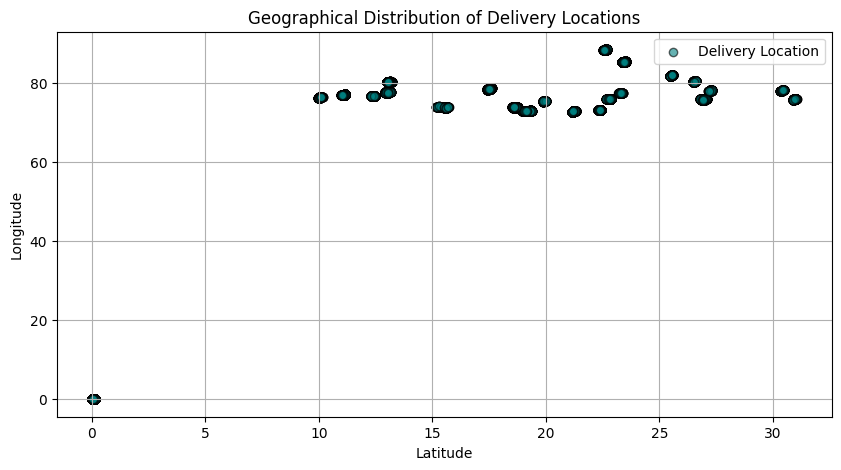

In [90]:
# Plot delivery locations
plt.figure(figsize=(10, 5))
plt.scatter(df['Delivery_location_latitude'], df['Delivery_location_longitude'], color='teal', label='Delivery Location', alpha=0.6, edgecolor='black')
plt.title('Geographical Distribution of Delivery Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid(True)
plt.show()


CONCLUSION :
- The scatter plot shows a clear clustering of delivery locations within a specific latitude range, indicating that most deliveries are concentrated in a particular region. This might suggest factors such as population density, economic activity, or infrastructure limitations influencing the distribution of delivery locations.

7. Weather Impact Analysis:
- Analyze how different Weather_conditions affect the Time_taken (min) . Use a boxplot to visualize this.

In [91]:
# Getting value counts for 'Weather_Conditions
df['Weather_conditions'].value_counts()

,count
Weather_conditions,
Fog,8269
Stormy,7584
Cloudy,7533
Sandstorms,7494
Windy,7422
Sunny,7282


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Weather_conditions', ylabel='Time_taken (min)'>

Text(0.5, 1.0, 'Impact of Weather Conditions on Delivery Time')

Text(0.5, 0, 'Weather Conditions')

Text(0, 0.5, 'Time Taken (min)')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Fog'),
  Text(1, 0, 'Stormy'),
  Text(2, 0, 'Sandstorms'),
  Text(3, 0, 'Windy'),
  Text(4, 0, 'Cloudy'),
  Text(5, 0, 'Sunny')])

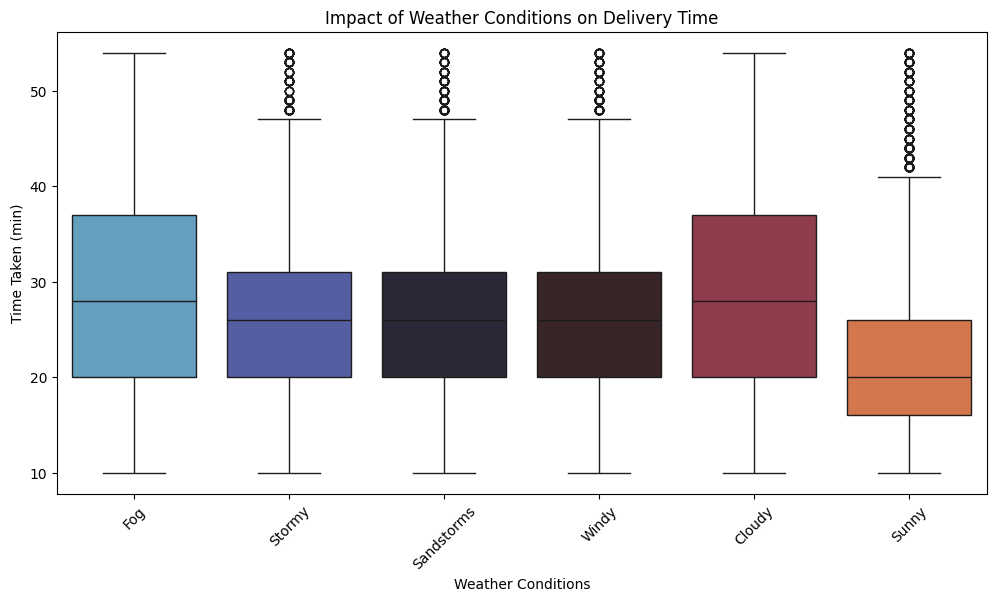

In [92]:
# Plotting Boxplot for weather_conditions and time_taken
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather_conditions', y='Time_taken (min)', data=df, palette='icefire')
plt.title('Impact of Weather Conditions on Delivery Time')
plt.xlabel('Weather Conditions')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

CONCLUSION :
- Fog and Cloudy Weather Conditions, have the most ranges, that means there values are spread most and are taking much time to deliver an order.
- There are outliers present in the Stormy, Sandstorms, Windy and Sunny Weather Conditions which mite lead to tell us that there are some instances where the delivery got delayed more that intended.
- Sunny Weather Condition is most suitable for delivery.

8. Traffic Analysis:
- What is the relationship between Road_traffic_density and Time_taken (min) ? Create a scatter plot to explore this relationship.

In [93]:
# Getting value counts for 'Road_traffic_density'
df['Road_traffic_density'].value_counts()

,count
Road_traffic_density,
Low,16077
Jam,14139
Medium,10945
High,4423


<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Road_traffic_density', ylabel='Time_taken (min)'>

Text(0.5, 1.0, 'Relationship between Road Traffic Density and Time Taken')

Text(0.5, 0, 'Road Traffic Density')

Text(0, 0.5, 'Time Taken (min)')

([0, 1, 2, 3],
 [Text(0, 0, 'Jam'),
  Text(1, 0, 'High'),
  Text(2, 0, 'Medium'),
  Text(3, 0, 'Low')])

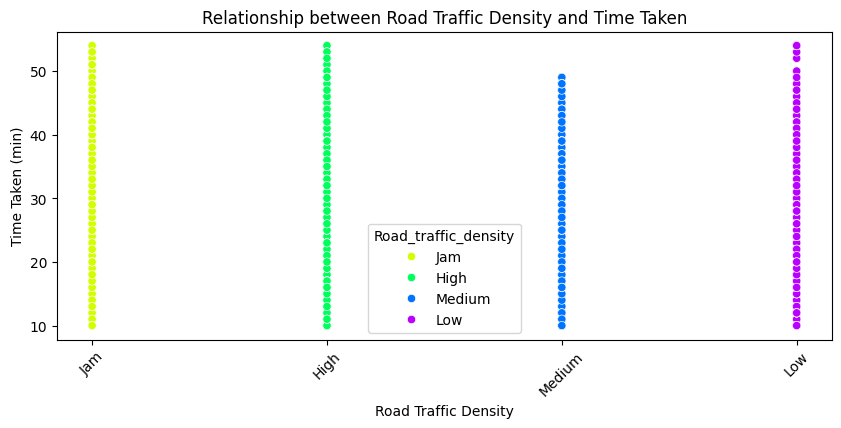

In [94]:
# Scatter Plot between 'Road_traffic_density' and 'Time_taken (min)'
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Road_traffic_density', y='Time_taken (min)', data=df, hue='Road_traffic_density', palette='hsv')
plt.title('Relationship between Road Traffic Density and Time Taken')
plt.xlabel('Road Traffic Density')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

CONCLUSION :
- I'm not able to comprehend this chart ☹.

9. Vehicle Analysis:
- Compare the Vehicle_condition against Time_taken (min) with a violin plot. Does vehicle condition appear to impact delivery time?

In [95]:
# Getting value counts for 'Vehicle_condition'
df['Vehicle_condition'].value_counts()

,count
Vehicle_condition,
2,15031
1,15028
0,15005
3,520


<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='Vehicle_condition', ylabel='Time_taken (min)'>

Text(0.5, 1.0, 'Impact of Vehicle Condition on Delivery Time')

Text(0.5, 0, 'Vehicle Condition')

Text(0, 0.5, 'Time Taken (min)')

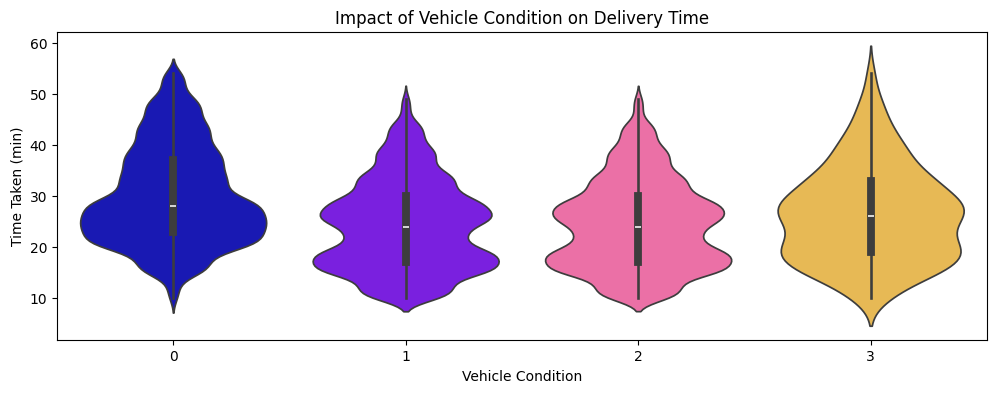

In [96]:
# Plotting Violin Plot For 'Vehicle_condition' and 'Time_taken (min)'
plt.figure(figsize=(12, 4))
sns.violinplot(x='Vehicle_condition', y='Time_taken (min)', data=df, palette='gnuplot2')
plt.title('Impact of Vehicle Condition on Delivery Time')
plt.xlabel('Vehicle Condition')
plt.ylabel('Time Taken (min)')
plt.show()

CONCLUSION :
- The plot suggests that vehicles in certain conditions (0 and 3) might be associated with slightly longer delivery times compared to others (1 and 2).
- Condition 1 and 2 show more consistent delivery times, condition 0 and 3 exhibit greater variability, indicating that factors beyond vehicle condition might also play a significant role in determining delivery times.

10. Multiple Deliveries Analysis:
- Does performing multiple deliveries in one trip affect the Time_taken (min) ? Use statistical tests to analyze the differences in delivery times.

In [97]:
# Categorizing the 'Multiple_deliveries' column in 'Single' and 'Multiple'
df['Multiple_deliveries'] = df['multiple_deliveries'].apply(lambda x: 'Single' if x == 1 else 'Multiple')

In [98]:
# Calculate the average and standard deviation of Time_taken (min) for both single and multiple deliveries.
single_delivery_stats = df[df['Multiple_deliveries'] == 'Single']['Time_taken (min)'].describe()
multiple_delivery_stats = df[df['Multiple_deliveries'] == 'Multiple']['Time_taken (min)'].describe()

single_delivery_stats
multiple_delivery_stats

,Time_taken (min)
count,29144.000000
mean,26.715653
std,8.575992
min,10.000000
25%,20.000000
50%,26.000000
75%,32.000000
max,54.000000


,Time_taken (min)
count,16440.000000
mean,25.546411
std,10.626980
min,10.000000
25%,17.000000
50%,24.000000
75%,33.000000
max,54.000000


CONCLUSION :
- The average delivery time is slightly lower for multiple deliveries, the difference is not substantial.
- Multiple deliveries exhibit more variability in delivery times, indicating that factors beyond the number of deliveries might influence delivery times.
- Factors like distance, traffic conditions, and order complexity could also influence delivery times and interact with the number of deliveries.

In [99]:
print(180*'*')

************************************************************************************************************************************************************************************


# **END OF REPORT**